# ARMA Models in `statsmodels` - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using statsmodels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('winning_400m.csv')
data['year'] = pd.to_datetime(data['year'].astype(str))
data.set_index('year', inplace=True)

In [2]:
# Preview the dataset
data

,winning_times
year,
1900-01-01,49.4
1904-01-01,49.2
1908-01-01,50.0
1912-01-01,48.2
1920-01-01,49.6
1924-01-01,47.6
1928-01-01,47.8
1932-01-01,46.2
1936-01-01,46.5


Plot this time series data. 

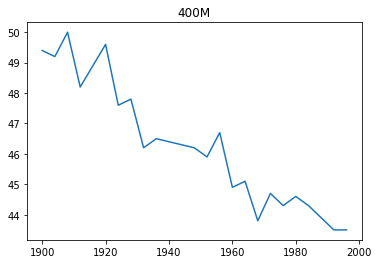

In [3]:
# Plot the time series
fig, ax = plt.subplots()
ax.plot(data)
ax.set_title('400M');

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff()
data_diff

,winning_times
year,
1900-01-01,NaN
1904-01-01,-0.2
1908-01-01,0.8
1912-01-01,-1.8
1920-01-01,1.4
1924-01-01,-2.0
1928-01-01,0.2
1932-01-01,-1.6
1936-01-01,0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

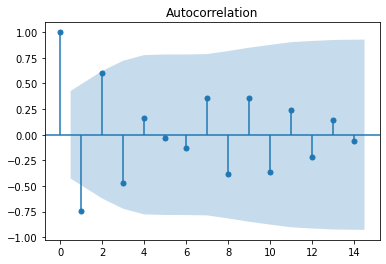

In [5]:
# Plot the ACF
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff.dropna());

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


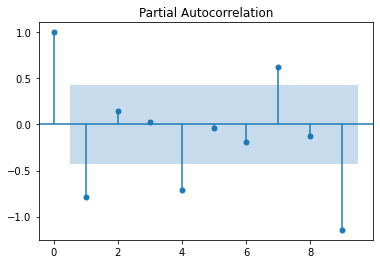

In [9]:
# Plot the PACF
plot_pacf(data_diff.dropna(), lags=9);

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [10]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA

In [11]:
arma_10 = ARMA(data_diff.dropna(), order=(0, 1)).fit()
arma_10

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [12]:
arma_10.summary()

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(0, 1)   Log Likelihood                 -22.654
Method:                       css-mle   S.D. of innovations              0.661
Date:                Thu, 21 Jul 2022   AIC                             51.308
Time:                        16:44:19   BIC                             54.442
Sample:                             0   HQIC                            51.988
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3108      0.022    -13.990      0.000      -0.354      -0.267
ma.L1.winning_times    -1.0000        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
arma_1 = ARMA(data_diff.dropna(), order=(1, 0)).fit()
arma_1

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [14]:
arma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Thu, 21 Jul 2022   AIC                             46.107
Time:                        16:44:42   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [15]:
arma_2 = ARMA(data_diff.dropna(), order=(1, 1)).fit()
arma_2

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [16]:
arma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 1)   Log Likelihood                 -19.958
Method:                       css-mle   S.D. of innovations              0.615
Date:                Thu, 21 Jul 2022   AIC                             47.916
Time:                        16:45:07   BIC                             52.094
Sample:                             0   HQIC                            48.822
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2850      0.086     -3.298      0.001      -0.454      -0.116
ar.L1.winning_times    -0.7708      0.160     -4.826      0.000      -1.084      -0.458
ma.L1.winning_times     0.1172      0.254      0.462      0.644      -0.380       0.614
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2974           +0.0000j            1.2974            0.5000
MA.1           -8.5305           +0.0000j            8.5305            0.5000
-----------------------------------------------------------------------------
"""

In [17]:
arma_3 = ARMA(data_diff.dropna(), order=(2, 2)).fit()
arma_3

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [18]:
arma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 21 Jul 2022   AIC                             44.943
Time:                        16:45:32   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.005      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.winning_times    -0.9182      0.092    -10.002      0.000      -1.098      -0.738
ma.L1.winning_times     1.5682      0.221      7.083      0.000       1.134       2.002
ma.L2.winning_times     1.0000      0.253      3.951      0.000       0.504       1.496
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9571           -0.4161j            1.0436           -0.4347
AR.2           -0.9571           +0.4161j            1.0436            0.4347
MA.1           -0.7841           -0.6206j            1.0000           -0.3934
MA.2           -0.7841           +0.6206j            1.0000            0.3934
-----------------------------------------------------------------------------
"""

In [19]:
arma_4 = ARMA(data_diff.dropna(), order=(3, 3)).fit()
arma_4

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [20]:
arma_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(3, 3)   Log Likelihood                 -15.374
Method:                       css-mle   S.D. of innovations              0.425
Date:                Thu, 21 Jul 2022   AIC                             46.747
Time:                        16:45:51   BIC                             55.103
Sample:                             0   HQIC                            48.561
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2943      0.035     -8.294      0.000      -0.364      -0.225
ar.L1.winning_times    -1.0514      0.205     -5.118      0.000      -1.454      -0.649
ar.L2.winning_times     0.2887      0.341      0.848      0.397      -0.379       0.956
ar.L3.winning_times     0.6165      0.210      2.932      0.003       0.204       1.029
ma.L1.winning_times     0.5626      0.251      2.243      0.025       0.071       1.054
ma.L2.winning_times    -0.5626      0.243     -2.317      0.021      -1.038      -0.087
ma.L3.winning_times    -1.0000      0.268     -3.737      0.000      -1.524      -0.476
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4603           -0.0000j            1.4603           -0.0000
AR.2           -0.9643           -0.4254j            1.0539           -0.4339
AR.3           -0.9643           +0.4254j            1.0539            0.4339
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.7813           -0.6242j            1.0000           -0.3927
MA.3           -0.7813           +0.6242j            1.0000            0.3927
-----------------------------------------------------------------------------
"""

In [21]:
arma_5 = ARMA(data_diff.dropna(), order=(3, 2)).fit()
arma_5

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

In [22]:
arma_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(3, 2)   Log Likelihood                 -16.471
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 21 Jul 2022   AIC                             46.941
Time:                        16:46:11   BIC                             54.253
Sample:                             0   HQIC                            48.528
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2723      0.098     -2.786      0.005      -0.464      -0.081
ar.L1.winning_times    -1.7674      0.260     -6.800      0.000      -2.277      -1.258
ar.L2.winning_times    -0.9373      0.471     -1.988      0.047      -1.861      -0.013
ar.L3.winning_times    -0.0106      0.255     -0.041      0.967      -0.511       0.489
ma.L1.winning_times     1.5688      0.220      7.133      0.000       1.138       2.000
ma.L2.winning_times     1.0000      0.250      4.003      0.000       0.510       1.490
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9574           -0.4170j            1.0442           -0.4346
AR.2           -0.9574           +0.4170j            1.0442            0.4346
AR.3          -86.9100           -0.0000j           86.9100           -0.5000
MA.1           -0.7844           -0.6202j            1.0000           -0.3935
MA.2           -0.7844           +0.6202j            1.0000            0.3935
-----------------------------------------------------------------------------
"""

In [24]:
arma_6 = ARMA(data_diff.dropna(), order=(2, 3)).fit()
arma_6.summary()

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 3)   Log Likelihood                 -16.470
Method:                       css-mle   S.D. of innovations              0.461
Date:                Thu, 21 Jul 2022   AIC                             46.941
Time:                        16:46:29   BIC                             54.252
Sample:                             0   HQIC                            48.528
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2725      0.098     -2.788      0.005      -0.464      -0.081
ar.L1.winning_times    -1.7554      0.109    -16.165      0.000      -1.968      -1.543
ar.L2.winning_times    -0.9167      0.099     -9.285      0.000      -1.110      -0.723
ma.L1.winning_times     1.5539      0.374      4.158      0.000       0.821       2.286
ma.L2.winning_times     0.9762      0.559      1.748      0.080      -0.119       2.071
ma.L3.winning_times    -0.0151      0.320     -0.047      0.962      -0.641       0.611
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9575           -0.4173j            1.0444           -0.4346
AR.2           -0.9575           +0.4173j            1.0444            0.4346
MA.1           -0.7845           -0.6201j            1.0000           -0.3935
MA.2           -0.7845           +0.6201j            1.0000            0.3935
MA.3           66.0411           -0.0000j           66.0411           -0.0000
-----------------------------------------------------------------------------
"""

In [25]:
arma_7 = ARMA(data_diff.dropna(), order=(1, 2)).fit()
arma_7.summary()

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 2)   Log Likelihood                 -19.076
Method:                       css-mle   S.D. of innovations              0.558
Date:                Thu, 21 Jul 2022   AIC                             48.152
Time:                        16:46:45   BIC                             53.374
Sample:                             0   HQIC                            49.285
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2784      0.148     -1.876      0.061      -0.569       0.012
ar.L1.winning_times    -0.4717      0.261     -1.807      0.071      -0.983       0.040
ma.L1.winning_times    -0.0096      0.169     -0.057      0.955      -0.341       0.322
ma.L2.winning_times     0.8467      0.498      1.702      0.089      -0.128       1.822
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1201           +0.0000j            2.1201            0.5000
MA.1            0.0057           -1.0867j            1.0867           -0.2492
MA.2            0.0057           +1.0867j            1.0867            0.2492
-----------------------------------------------------------------------------
"""

In [26]:
arma_8 = ARMA(data_diff.dropna(), order=(2, 1)).fit()
arma_8.summary()

C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\mycha\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Thu, 21 Jul 2022   AIC                             47.911
Time:                        16:47:00   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.000      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.200      0.000      -1.915      -1.450
ar.L2.winning_times    -0.7714      0.128     -6.023      0.000      -1.022      -0.520
ma.L1.winning_times     1.0000      0.132      7.549      0.000       0.740       1.260
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0906           -0.3268j            1.1385           -0.4537
AR.2           -1.0906           +0.3268j            1.1385            0.4537
MA.1           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

# Your comments here
We chose the arma_3 model (2,2) as our best model because it provided us with the lowest AIC 
score.

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 